# 2023-03-02

# Time series ANN 

In [9]:
import pandas as pd

df = pd.read_csv('time_series_data.csv', index_col = [0])
df.head()

,time,sereis
0,0.0,27.980286
1,1.0,24.258190
2,2.0,29.057243
3,3.0,34.388184
4,4.0,23.919535


In [13]:
# data의 형태 변환 (input과 target 데이터)

input = []
target = []

values = df['sereis'].values
window_size = 5

for i in range(len(values) - window_size):
		x = values[i:window_size + i]
		y = values[window_size + i]
		input.append(x)
		target.append(y)

In [14]:
print(len(input))
print(len(target))

1456
1456


In [15]:
# numpy array형태로 다시 변환

import numpy as np

input = np.array(input)
target = np.array(target).reshape(-1, 1)
print(input.shape)
print(target.shape)

(1456, 5)
(1456, 1)


In [17]:
# train/test split

test_size = 100
split_idx = len(input) - test_size
print(split_idx)

X_train = input[:split_idx]
X_test = input[split_idx:]
y_train = target[:split_idx]
y_test = target[split_idx:]

1356


In [19]:
# time series ANN

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Dense(10, input_shape = [window_size], activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [19]:
# model 학습

adam = tf.keras.optimizers.Adam(0.000001)
model.compile(loss = 'mse', optimizer = adam)
history = model.fit(X_train, y_train, epochs = 20)

In [21]:
# 모델 평가

model_prediction = model.predict([X_test])

4/4 [==============================] - 0s 2ms/step


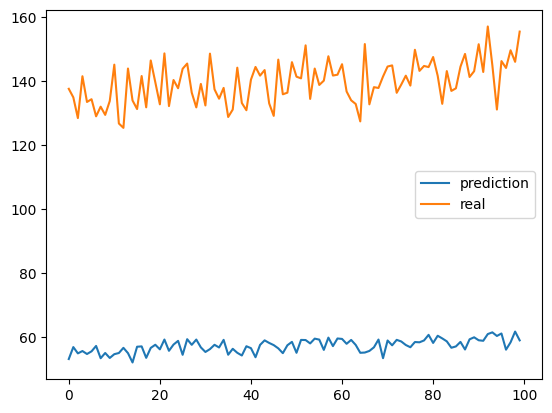

In [22]:
import matplotlib.pyplot as plt

plt.plot(model_prediction, label = 'prediction')
plt.plot(y_test, label = 'real')
plt.legend()

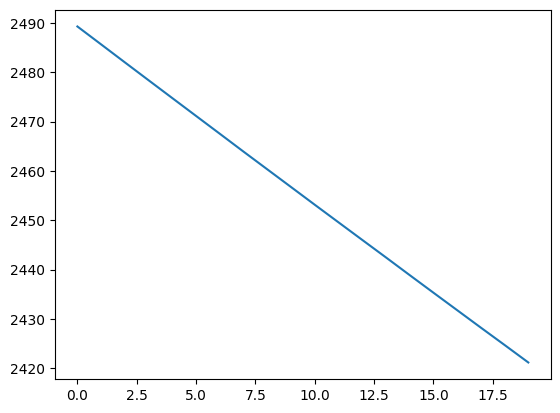

In [24]:
plt.plot(history.history['loss'])          

### learning rate가 작아 loss가 수렴하지 못함.
1. learning rate를 높여 다시 학습시킴
2. learning rate를 점차 높인다.

In [33]:
# 2. learning rate를 점차 높임

learning_rate_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10 **(epoch/20))   # epoch가 늘어나면 늘어날수록 learning rate가 점점 늘어나도록

In [30]:
# 위 lambda를 눈으로 보기 위해 for문으로 출력

for epoch in range(1, 30):
    print(epoch, 'learning rate : ', 1e-8 * 10 ** (epoch/20))

1 learning rate :  1.1220184543019634e-08
2 learning rate :  1.2589254117941673e-08
3 learning rate :  1.4125375446227544e-08
4 learning rate :  1.5848931924611136e-08
5 learning rate :  1.7782794100389228e-08
6 learning rate :  1.9952623149688796e-08
7 learning rate :  2.2387211385683395e-08
8 learning rate :  2.51188643150958e-08
9 learning rate :  2.8183829312644537e-08
10 learning rate :  3.16227766016838e-08
11 learning rate :  3.548133892335755e-08
12 learning rate :  3.981071705534972e-08
13 learning rate :  4.466835921509632e-08
14 learning rate :  5.011872336272722e-08
15 learning rate :  5.623413251903491e-08
16 learning rate :  6.309573444801934e-08
17 learning rate :  7.079457843841378e-08
18 learning rate :  7.943282347242815e-08
19 learning rate :  8.912509381337454e-08
20 learning rate :  1e-07
21 learning rate :  1.1220184543019637e-07
22 learning rate :  1.2589254117941675e-07
23 learning rate :  1.4125375446227541e-07
24 learning rate :  1.5848931924611133e-07
25 lear

In [34]:
# 모델 학습

model2 = Sequential()
model2.add(Dense(10, input_shape = [window_size], activation = 'relu'))
model2.add(Dense(10, activation = 'relu'))
model2.add(Dense(1, activation = 'linear'))
adam = tf.keras.optimizers.Adam(0.000001)
model2.compile(loss = 'mse', optimizer = adam)
history2 = model.fit(X_train, y_train, epochs = 100, callbacks = [learning_rate_callback])    # callback파라미터에 learning_rate_callback을 list형태로

Epoch 1/100
43/43 [==============================] - 0s 1ms/step - loss: 2414.2961 - lr: 1.0000e-08
Epoch 2/100
43/43 [==============================] - 0s 1ms/step - loss: 2414.2759 - lr: 1.1220e-08
Epoch 3/100
43/43 [==============================] - 0s 1ms/step - loss: 2414.2534 - lr: 1.2589e-08
Epoch 4/100
43/43 [==============================] - 0s 1ms/step - loss: 2414.2312 - lr: 1.4125e-08
Epoch 5/100
43/43 [==============================] - 0s 1ms/step - loss: 2414.1902 - lr: 1.5849e-08
Epoch 6/100
43/43 [==============================] - 0s 1ms/step - loss: 2414.1313 - lr: 1.7783e-08
Epoch 7/100
43/43 [==============================] - 0s 1ms/step - loss: 2414.0698 - lr: 1.9953e-08
Epoch 8/100
43/43 [==============================] - 0s 1ms/step - loss: 2414.0046 - lr: 2.2387e-08
Epoch 9/100
43/43 [==============================] - 0s 1ms/step - loss: 2413.9290 - lr: 2.5119e-08
Epoch 10/100
43/43 [==============================] - 0s 2ms/step - loss: 2413.8484 - lr: 2.8184e-08

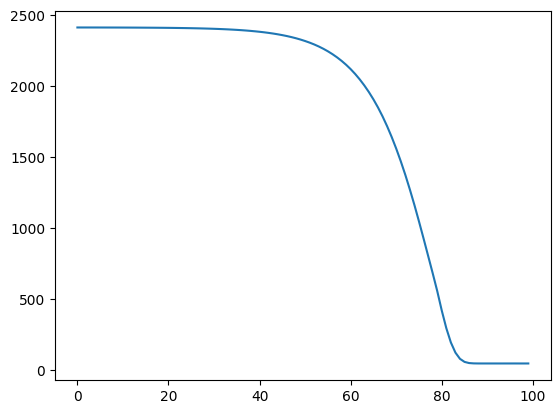

In [35]:
import matplotlib.pyplot as plt

plt.plot(range(len(history2.history['loss'])), history2.history['loss'])

In [36]:
# 예측

y_pred = model2.predict(X_test)

4/4 [==============================] - 0s 2ms/step


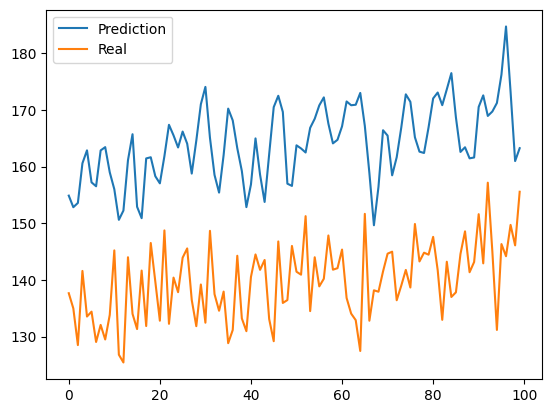

In [37]:
plt.plot(y_pred, label = 'Prediction')
plt.plot(y_test, label = 'Real')
plt.legend()

## Hyperparameter Tuning

In [38]:
!pip install keras-tuner

     ------------------------------------- 167.3/167.3 kB 10.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
# keras tuner를 사용하여 model을 만들기 위한 builder
# dense층의 layer unit 개수를 수정 -> 어디서부터 어디까지(10 ~ 30)
# learning rate값을 수정 -> (0.001 ~ 0.005)
# builder : 위의 정보를 포함하는 것

# model builder 함수 생성 (compile단계까지의 model)

def model_builder(hp):                                                               # hp매개변수 : hyperparameter
    model = Sequential()                                                             # model에 대한 도화지 생성
    layer_units = hp.Int('units', min_value = 10, max_value = 30, step = 2)           # 최소 10개에서 최대 30개까지 2개씩 / layer 안 layer unit들(퍼셉트론의 개수)의 갯수를 지정 (Dense의 갯수를 지정하는 것) -> model2.add(Dense(units, activation='relu'))
    model.add(Dense(layer_units, activation = 'relu', input_shape = [window_size]))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1, activation = 'linear'))
    hp_lr = hp.Choice('learning_rate', values = [0.0001, 0.001, 0.01])
    model.compile(loss = 'mse', optimizer = tf.keras.optimizers.Adam(learning_rate = hp_lr))
    return model

In [42]:
# parameter들의 값을 random하게 찾는다.

from keras_tuner.tuners import RandomSearch

tuner = RandomSearch(model_builder,
                    objective = 'loss', max_trials = 150, 
                    executions_per_trial = 3, directory = 'dir',
                    project_name = 'search_hp', overwrite = True)


In [43]:
tuner.search(X_train, y_train, epochs = 30)   # tuner.search(X_train, y_train, epochs = 30, verbose = 0) -> 출력갯수 안나옴

Trial 32 Complete [00h 00m 11s]
loss: 44.808634440104164

Best loss So Far: 44.06345876057943
Total elapsed time: 00h 06m 37s
INFO:tensorflow:Oracle triggered exit


In [45]:
tuner.results_summary()

Results summary
Results in dir\search_hp
Showing 10 best trials
Trial summary
Hyperparameters:
units: 20
learning_rate: 0.001
Score: 44.06345876057943
Trial summary
Hyperparameters:
units: 28
learning_rate: 0.001
Score: 44.29498418172201
Trial summary
Hyperparameters:
units: 26
learning_rate: 0.001
Score: 44.3091926574707
Trial summary
Hyperparameters:
units: 22
learning_rate: 0.001
Score: 44.345359802246094
Trial summary
Hyperparameters:
units: 14
learning_rate: 0.01
Score: 44.41689936319987
Trial summary
Hyperparameters:
units: 24
learning_rate: 0.01
Score: 44.66345723470052
Trial summary
Hyperparameters:
units: 16
learning_rate: 0.01
Score: 44.73227310180664
Trial summary
Hyperparameters:
units: 30
learning_rate: 0.01
Score: 44.808634440104164
Trial summary
Hyperparameters:
units: 10
learning_rate: 0.01
Score: 44.816183725992836
Trial summary
Hyperparameters:
units: 28
learning_rate: 0.01
Score: 44.879276275634766


In [52]:
best_models = tuner.get_best_models(num_models = 4)   # loss가 작은, 즉 score기준으로 가장 좋은 모델 4개를 선택

In [53]:
model = best_models[0]

In [54]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


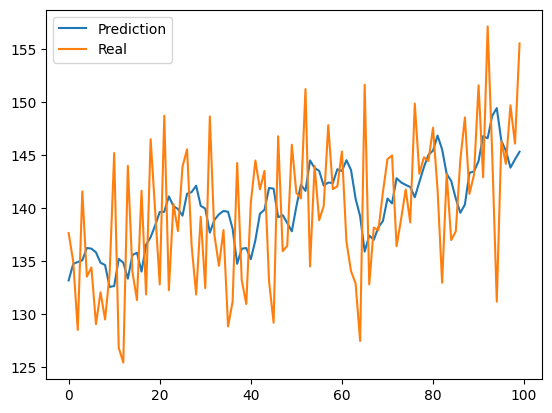

In [55]:
plt.plot(y_pred, label = 'Prediction')
plt.plot(y_test, label = 'Real')
plt.legend()

## RNN code 구현

In [3]:
# RNN 모델 생성

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(3, input_shape = (2, 10)))
# model.add(SimpleRNN(hidden_units, input_shape = (timesteps, input_dim)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [4]:
# 위code와 같은 code

model = Sequential()
# timesteps = input_length
model.add(SimpleRNN(3, input_length = 2, input_dim = 10))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


### Use batch

In [6]:
# use batch

model = Sequential()
# model.add(SimpleRNN(hidden unit, batch_input_shape = (batch_size, timesteps(input_length), input_dim)))
model.add(SimpleRNN(3, batch_input_shape = (8, 2, 10)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (8, 3)                    42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


### Use batch / return_sequence = True

In [7]:
model = Sequential()

model.add(SimpleRNN(3, batch_input_shape = (8, 2, 10), return_sequences = True))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (8, 2, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


### 깊은 순환신경망

In [8]:
model = Sequential()
# timesteps = input_length
model.add(SimpleRNN(3, input_length = 10, input_dim = 5, return_sequences = True))
model.add(SimpleRNN(3, return_sequences = True))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 10, 3)             27        
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 10, 3)             21        
                                                                 
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


### Simple RNN (use Data) 

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM

# batch_size = 1, timesteps = 4, input_dim = 5
train_X = [[
    [0.1, 4.2, 1.5, 1.1, 2.8], 
    [1.0, 3.1, 2.5, 0.7, 1.1],
    [0.3, 2.1, 1.5, 2.1, 0.1],
    [2.2, 1.4, 0.5, 0.9, 1.1]
    ]]
train_X = np.array(train_X, dtype=np.float32)
print(train_X.shape)

(1, 4, 5)


### hidden_units = 3

In [11]:
rnn = SimpleRNN(3)                               # hidden_units = 3 지정
hidden_states = rnn(train_X)
print(f'input shape : {train_X.shape}')
print(train_X)
print(f'hidden(output) shape : {hidden_states.shape}')     # 1의 batch_size를 가지고 hidden_unit이 3개인 것을 뽑아낸다.
print(hidden_states)

input shape : (1, 4, 5)
[[[0.1 4.2 1.5 1.1 2.8]
  [1.  3.1 2.5 0.7 1.1]
  [0.3 2.1 1.5 2.1 0.1]
  [2.2 1.4 0.5 0.9 1.1]]]
hidden(output) shape : (1, 3)
tf.Tensor([[-0.894208    0.97775185  0.2798687 ]], shape=(1, 3), dtype=float32)


### hidden_units = 3, return_sequences = True

In [14]:
rnn = SimpleRNN(3, return_sequences = True)                               # hidden_units = 3 지정
hidden_states = rnn(train_X)
print(f'input shape : {train_X.shape}')
print(train_X)
print(hidden_states)

input shape : (1, 4, 5)
[[[0.1 4.2 1.5 1.1 2.8]
  [1.  3.1 2.5 0.7 1.1]
  [0.3 2.1 1.5 2.1 0.1]
  [2.2 1.4 0.5 0.9 1.1]]]
tf.Tensor(
[[[-0.9989922   0.9938559   0.9549823 ]
  [-0.999855    0.99971086  0.64664173]
  [-0.9862814   0.948516    0.18860888]
  [-0.9980199   0.99788046  0.7155295 ]]], shape=(1, 4, 3), dtype=float32)


### hidden_units = 3, return_sequences = True, return_state = True

- return_state = True인 경우에는 return_sequences의 True/False와 관계없이 last_states는 마지막 hidden state를 출력

In [17]:
rnn = SimpleRNN(3, return_sequences = True, return_state = True)      # 마지막 결과물을 return한다.                         # hidden_units = 3 지정
hidden_states, last_states = rnn(train_X)
print('-----------input---------')
print(f'input shape : {train_X.shape}')
print(train_X)
print('-----------hidden---------')
print(hidden_states)
print('-----------last-----------')
print(last_states)

-----------input---------
input shape : (1, 4, 5)
[[[0.1 4.2 1.5 1.1 2.8]
  [1.  3.1 2.5 0.7 1.1]
  [0.3 2.1 1.5 2.1 0.1]
  [2.2 1.4 0.5 0.9 1.1]]]
-----------hidden---------
tf.Tensor(
[[[-0.9704944   0.9998834  -0.999966  ]
  [-0.8847976   0.99005395 -0.9999965 ]
  [-0.38180423  0.5701262  -0.99997085]
  [ 0.15831578  0.9953629  -0.99831873]]], shape=(1, 4, 3), dtype=float32)
-----------last-----------
tf.Tensor([[ 0.15831578  0.9953629  -0.99831873]], shape=(1, 3), dtype=float32)


### hidden_units = 3, return_sequences = False, return_state = True

In [18]:
rnn = SimpleRNN(3, return_sequences = False, return_state = True)      # 마지막 결과물을 return한다.                         # hidden_units = 3 지정
hidden_states, last_states = rnn(train_X)
print('-----------input---------')
print(f'input shape : {train_X.shape}')
print(train_X)
print('-----------hidden---------')
print(hidden_states)
print('-----------last-----------')
print(last_states)

-----------input---------
input shape : (1, 4, 5)
[[[0.1 4.2 1.5 1.1 2.8]
  [1.  3.1 2.5 0.7 1.1]
  [0.3 2.1 1.5 2.1 0.1]
  [2.2 1.4 0.5 0.9 1.1]]]
-----------hidden---------
tf.Tensor([[-0.98477316 -0.9433979   0.93823135]], shape=(1, 3), dtype=float32)
-----------last-----------
tf.Tensor([[-0.98477316 -0.9433979   0.93823135]], shape=(1, 3), dtype=float32)


## LSTM

### hidden_units = 3, return_sequences = False, return_state = True

In [24]:
lstm = LSTM(3, return_sequences = False, return_state = True)
hidden_states, last_states, last_cell_states = lstm(train_X)
print('-----------input---------')
print(f'input shape : {train_X.shape}')
print(train_X)
print('-----------hidden---------')
print(hidden_states)
print('-----------last-----------')
print(last_states)
print('---------last cell--------')
print(last_cell_states)

-----------input---------
input shape : (1, 4, 5)
[[[0.1 4.2 1.5 1.1 2.8]
  [1.  3.1 2.5 0.7 1.1]
  [0.3 2.1 1.5 2.1 0.1]
  [2.2 1.4 0.5 0.9 1.1]]]
-----------hidden---------
tf.Tensor([[-0.01585419 -0.14560647 -0.4388431 ]], shape=(1, 3), dtype=float32)
-----------last-----------
tf.Tensor([[-0.01585419 -0.14560647 -0.4388431 ]], shape=(1, 3), dtype=float32)
---------last cell--------
tf.Tensor([[-0.10175562 -0.19464266 -1.6300435 ]], shape=(1, 3), dtype=float32)


### hidden_units = 3, retrun_sequences = True, return_state = True

In [26]:
lstm = LSTM(3, return_sequences = True, return_state = True)
hidden_states, last_states, last_cell_states = lstm(train_X)
print('-----------input---------')
print(f'input shape : {train_X.shape}')
print(train_X)
print('-----------hidden---------')
print(hidden_states)
print('-----------last-----------')
print(last_states)
print('---------last cell--------')
print(last_cell_states)

-----------input---------
input shape : (1, 4, 5)
[[[0.1 4.2 1.5 1.1 2.8]
  [1.  3.1 2.5 0.7 1.1]
  [0.3 2.1 1.5 2.1 0.1]
  [2.2 1.4 0.5 0.9 1.1]]]
-----------hidden---------
tf.Tensor(
[[[-0.5009944  -0.0291432   0.3757765 ]
  [-0.57672    -0.03825234  0.5496826 ]
  [-0.72937137 -0.08644087  0.47553623]
  [-0.3529299   0.08841487  0.1937968 ]]], shape=(1, 4, 3), dtype=float32)
-----------last-----------
tf.Tensor([[-0.3529299   0.08841487  0.1937968 ]], shape=(1, 3), dtype=float32)
---------last cell--------
tf.Tensor([[-2.2216802   0.15844843  0.61618555]], shape=(1, 3), dtype=float32)


## [실습] 실제 데이터를 바탕으로 한 RNN(LSTM) Model 만들기

In [1]:
import pandas as pd

df = pd.read_csv('Alcohol_Sales.csv', index_col = 'DATE', parse_dates = True)
df.columns = ['Sales']
df.head()

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


### 데이터분석 - visualizing 과정

<AxesSubplot: xlabel='DATE'>

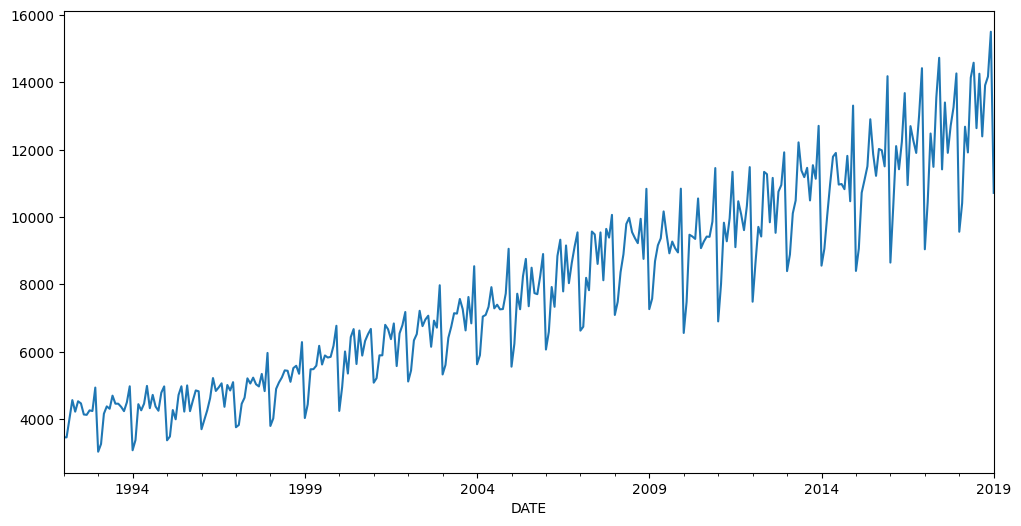

In [2]:
df['Sales'].plot(figsize=(12, 6))

In [3]:
# 모델을 만들기 전 데이터의 trend 및 계절성을 확인하는 과정(데이터분석:visualizing)

from statsmodels.tsa.seasonal import seasonal_decompose
df.index.freq = 'MS'

result = seasonal_decompose(df['Sales'])

<AxesSubplot: xlabel='DATE'>

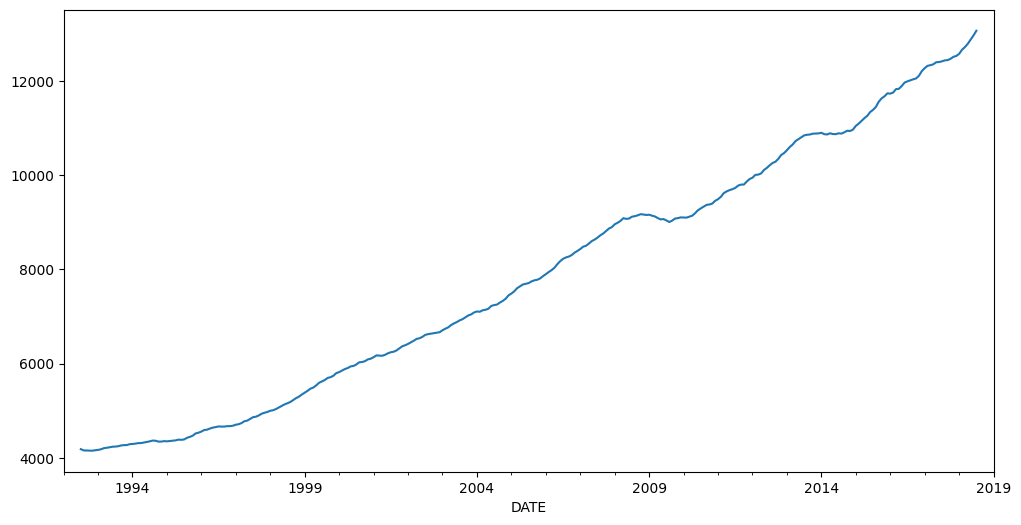

In [4]:
# trend

result.trend.plot(figsize=(12, 6))

<AxesSubplot: xlabel='DATE'>

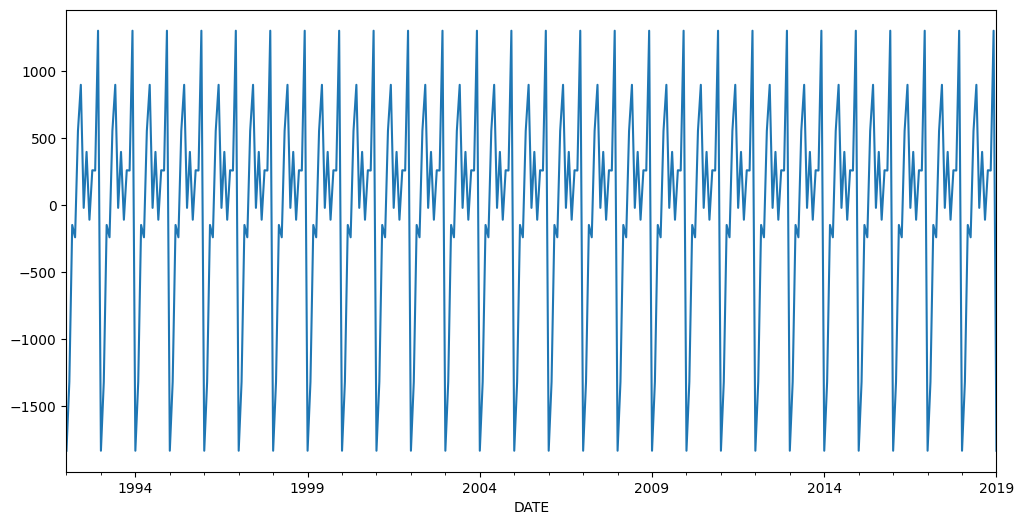

In [5]:
# 계절성

result.seasonal.plot(figsize=(12, 6))

<AxesSubplot: xlabel='DATE'>

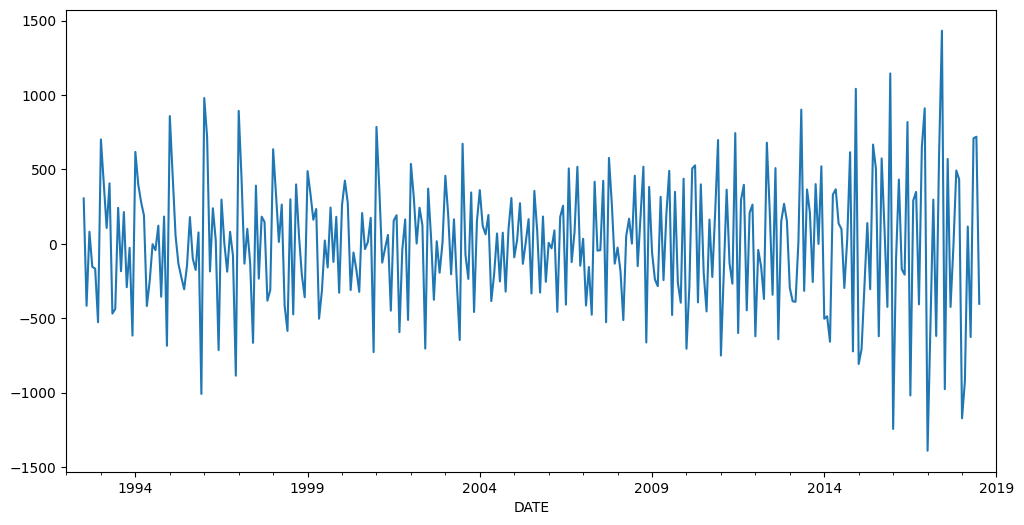

In [6]:
# noise 제거

result.resid.plot(figsize=(12, 6))

In [42]:
# Model

# train/test split
# sacling
# modeling(compile, fit)
# model evaluate

## train/test split

In [7]:
df.head()

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [44]:
df.shape

(325, 1)

In [47]:
print(df.index.min())
print(df.index.max())

1992-01-01 00:00:00
2019-01-01 00:00:00


In [8]:
test_size = 36
split_idx = len(df) - test_size

train = df.iloc[:split_idx]
test = df.iloc[split_idx:]
print(train.shape)
print(test.shape)

(289, 1)
(36, 1)


## scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

### [Test TimeseriesGenerator] (학습용)

In [11]:
import tensorflow as tf
window_size = 2
generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(scaled_train, scaled_train, length = window_size, batch_size = 1)

In [53]:
generator

In [60]:
scaled_train[:10].flatten()

array([0.03837877, 0.0382891 , 0.08706958, 0.13746413, 0.10670732,
       0.13432568, 0.12867647, 0.09917504, 0.09818867, 0.11011478])

In [59]:
for i in range(10):
    X, y = generator[i]
    print(f'input: {X.flatten()}, target: {y}')

input: [0.03837877 0.0382891 ], target: [[0.08706958]]
input: [0.0382891  0.08706958], target: [[0.13746413]]
input: [0.08706958 0.13746413], target: [[0.10670732]]
input: [0.13746413 0.10670732], target: [[0.13432568]]
input: [0.10670732 0.13432568], target: [[0.12867647]]
input: [0.13432568 0.12867647], target: [[0.09917504]]
input: [0.12867647 0.09917504], target: [[0.09818867]]
input: [0.09917504 0.09818867], target: [[0.11011478]]
input: [0.09818867 0.11011478], target: [[0.10841105]]
input: [0.11011478 0.10841105], target: [[0.17082138]]


### TimeseriesGenerator

In [12]:
# window_size = 12 / 12개월 데이터를 input으로 넣어 -> 1개월 데이터를 예측(target)

window_size = 12               
generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(scaled_train, scaled_train, length = window_size, batch_size = 1)

## modeling(compile, fit)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (window_size, 1)))   # feature가 1개
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(generator, epochs = 30)

Epoch 1/30
277/277 [==============================] - 3s 6ms/step - loss: 0.0227
Epoch 2/30
277/277 [==============================] - 2s 7ms/step - loss: 0.0077
Epoch 3/30
277/277 [==============================] - 2s 7ms/step - loss: 0.0080
Epoch 4/30
277/277 [==============================] - 2s 6ms/step - loss: 0.0067
Epoch 5/30
277/277 [==============================] - 2s 7ms/step - loss: 0.0065
Epoch 6/30
277/277 [==============================] - 2s 7ms/step - loss: 0.0051
Epoch 7/30
277/277 [==============================] - 2s 7ms/step - loss: 0.0051
Epoch 8/30
277/277 [==============================] - 2s 7ms/step - loss: 0.0032
Epoch 9/30
277/277 [==============================] - 2s 6ms/step - loss: 0.0035
Epoch 10/30
277/277 [==============================] - 2s 6ms/step - loss: 0.0026
Epoch 11/30
277/277 [==============================] - 2s 7ms/step - loss: 0.0024
Epoch 12/30
277/277 [==============================] - 2s 7ms/step - loss: 0.0020
Epoch 13/30
277/277 [====

## model evaluate(평가)

In [ ]:
# 12개월의 데이터가 필요
# test data/ 필요한 데이터
# 2016-02-01 -> 2015-02-01 ~ 2016-01-01
# 2019-01-01 -> 2018-01-01 ~ 2018-12-01
# 한번에 모든 test데이터를 검증하는 것이 가능할까?

In [15]:
# 2016-02-01

batch = scaled_train[-12:].reshape(1, window_size, 1)

In [16]:
model.predict(batch)           # 2016-01-01을 예측한 것

1/1 [==============================] - 0s 208ms/step


array([[0.5348974]], dtype=float32)

In [17]:
scaled_test[0]

array([0.6536944])

In [18]:
# 2016-03-01을 예측하기 위해선 train 데이터에선 11개밖에 쓰지 못한다.

scaled_train[-11:]

array([[0.68965208],
       [0.72417504],
       [0.76013271],
       [0.88531205],
       [0.79250359],
       [0.73466643],
       [0.8062231 ],
       [0.80272597],
       [0.75995337],
       [1.        ],
       [0.50367647]])

In [19]:
# 예측한 결과를 마지막에 append해주어 12개를 채운다.

import numpy as np

batch2 = np.append(scaled_train[-11:], [scaled_test[0]])
batch2.shape
print(batch2)

[0.68965208 0.72417504 0.76013271 0.88531205 0.79250359 0.73466643
 0.8062231  0.80272597 0.75995337 1.         0.50367647 0.6536944 ]


In [ ]:
# 모델의 결과를 for문으로 작성하고 scaled_test비교

### predict

In [31]:
batch = scaled_train[-12:].reshape(1, window_size, 1)
predict_result = []
for test_values in scaled_test[:, 0]:
    prediction = model.predict(batch)[0]                                            # 예측 결과가 array형태라 value만 선택하기 위해
    predict_result.append(prediction)
    batch = np.append(batch[0, -11:], [prediction]).reshape(1, window_size, 1)
predict_result = np.array(predict_result)

1/1 [==============================] - 0s 30ms/step


### Inverse Predict Data

In [34]:
inverse_prediction_data = scaler.inverse_transform(predict_result)

In [36]:
test['Model_Prediction'] = inverse_prediction_data.copy()
test.head()

C:\Users\GM220808\AppData\Local\Temp\ipykernel_14724\508246675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Model_Prediction'] = inverse_prediction_data.copy()


,Sales,Model_Prediction
DATE,,
2016-02-01,10321,8996.175781
2016-03-01,12107,10325.283203
2016-04-01,11420,10678.236328
2016-05-01,12238,11174.797852
2016-06-01,13681,12252.255859


<AxesSubplot: xlabel='DATE'>

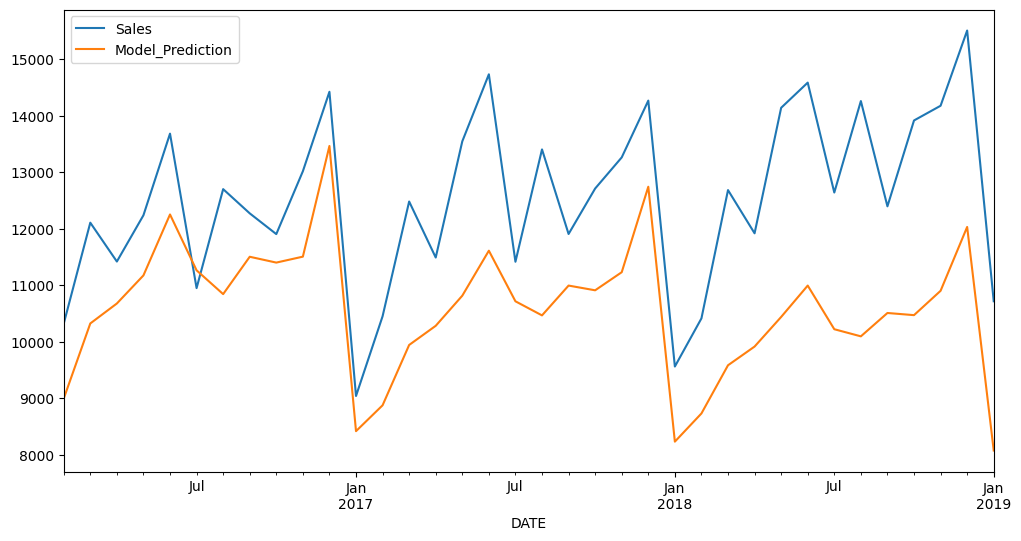

In [37]:
test.plot(figsize=(12, 6))